<a href="https://colab.research.google.com/github/gustavods07/Credit-Risk-Data-Analysis/blob/master/credit_risk_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRIRIES:**

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.feature_selection import mutual_info_regression
import pickle
from xgboost import XGBRegressor

**APPLIED DATASET:** https://www.kaggle.com/laotse/credit-risk-dataset

**READING THE .CSV FILE AND DISPLAYING THE DATA DISPOSITION:**

**DATA DESCRIPTION:**

* person_age	= Age 
* person_income	Annual = Income
* personhomeownership	= Home ownership
* personemplength	= Employment length (in years)
* loan_intent	= Loan intent
* loan_grade =	Loan grade
* loan_amnt =	Loan amount
* loanintrate =	Interest rate
* loan_status	= Loan status (0 is non default 1 is default)
* loanpercentincome =	Percent income
* cbpersondefaultonfile =	Historical default
* cbpresoncredhistlength =	Credit history length

In [152]:
data = pd.read_csv('/content/sample_data/credit_risk_dataset.csv')
data ## displays the data disposition

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


**COUNTING THE UNIQUE VALUES OF A COLUMN (IN THIS CASE, THE 'person_age' COLUMN) FROM A FILTERED AMOUNT OF DATA:**




In [153]:
loan_people = np.unique(data['loan_status'], return_counts = True) ## it is possible to comprehend how much people of this dataset are or aren't in debts
default = data[data['loan_status'] == 1] ## here the data is filtered to group only the data from people with debts (loan_status = 1) into the default variable
age_diversity = np.unique(default['person_age']) ## it is possible to understand how diverse is this dataset in terms of age
print(loan_people)
print(age_diversity)

(array([0, 1]), array([25473,  7108]))
[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 65 66 70]


**PLOTING THE OBTAINED DATA FROM THE PREVIOUS COMMAND INTO GRAPHS:**

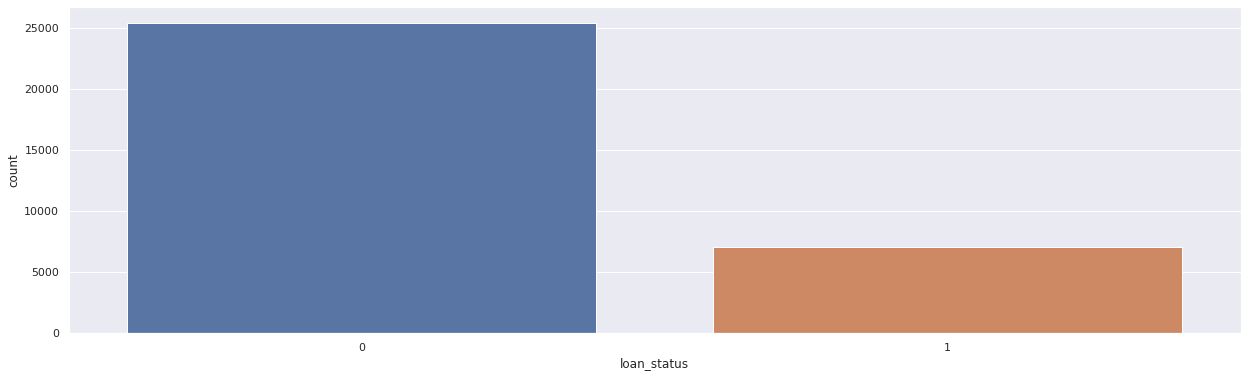

In [154]:
sns.countplot(x = data['loan_status']);
## it is possible to comprehend the loan status disposition of the people monitored in this dataset
## 0 = without debts, 1 = in debts

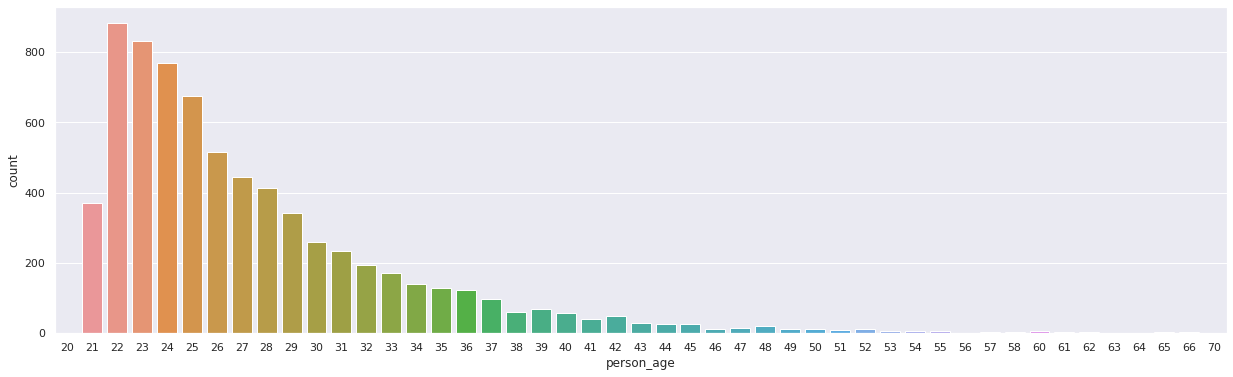

In [155]:
sns.set(rc = {'figure.figsize':(21,6)}) ## changes the plot dimensions to display correctly the parameters
sns.countplot(x = default['person_age']); ## shows how much people have the documented ages
## it is possible to comprehend the age disposition of the people monitored in this dataset

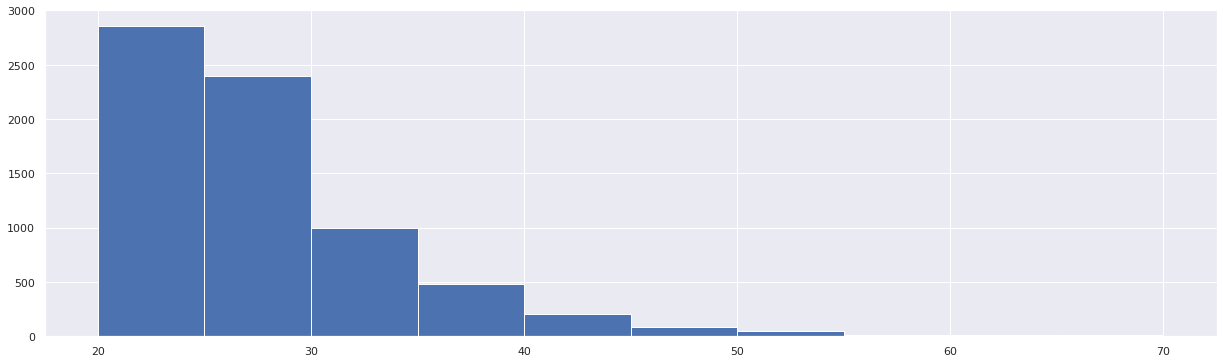

In [156]:
plt.hist(x = default['person_age']); 
## shows the distribuition of the people in debts in age intervals (using a histogram)
## it's important to say that the values at the bottom represent the age and the values at the right size represent the number of people
## since the number of people with more than 60 years is low, the values cannot be observed in this plot

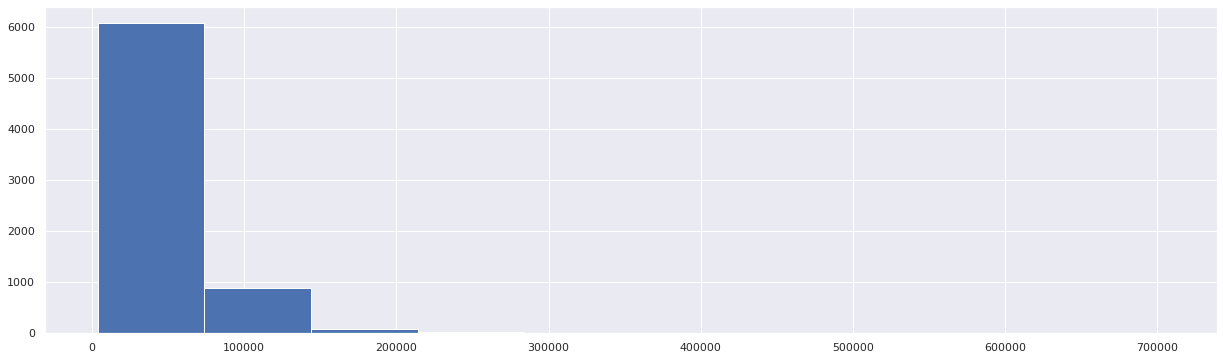

In [157]:
plt.hist(x = default['person_income']);
## shows the distribuition of the people in debts in income intervals (using a histogram)


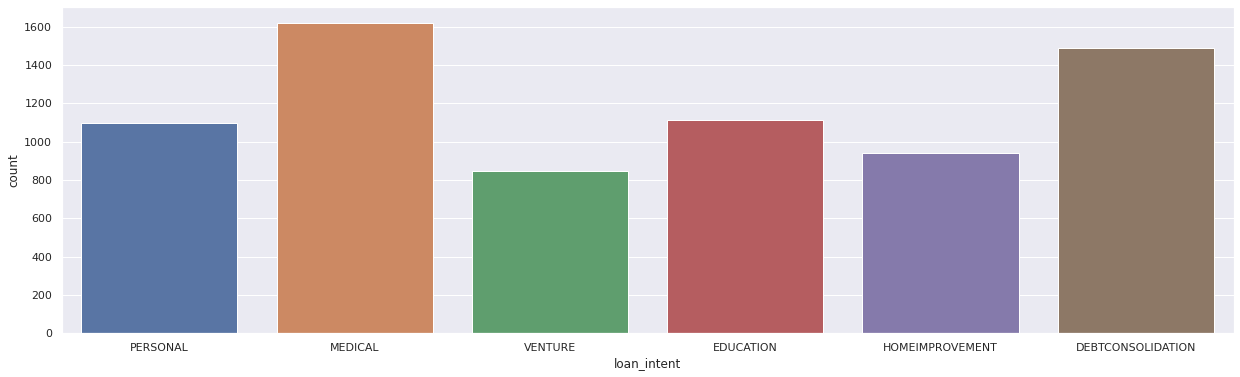

In [158]:
sns.countplot(x = default['loan_intent']);
## shows the distribuition of loan intent between people in debts


**PARTIAL CONCLUSIONS 1:**
* At this moment is possible comprehend that young people are 
substentialy more in debts than older people.
* It is also possible to understand that the proportion of people with debts per people without debts is $7108/25473$.
* The 4th graph shows how people in debts usually have lower incomes.
* The 5th graph shows that Medical and Debit Consolidation loans are the most commom debts.


**FILTERING AND CLUSTERING DATA**:

In [159]:
higher_income = default[default['person_income']>= 10000 ] ## people in debts with income higher than 99999
lower_income = default[default['person_income']< 10000 ] ## people in debts with lower higher than 10000

**GRAPHS BASED IN THESE TWO CLUSTERED PARAMETERS:**

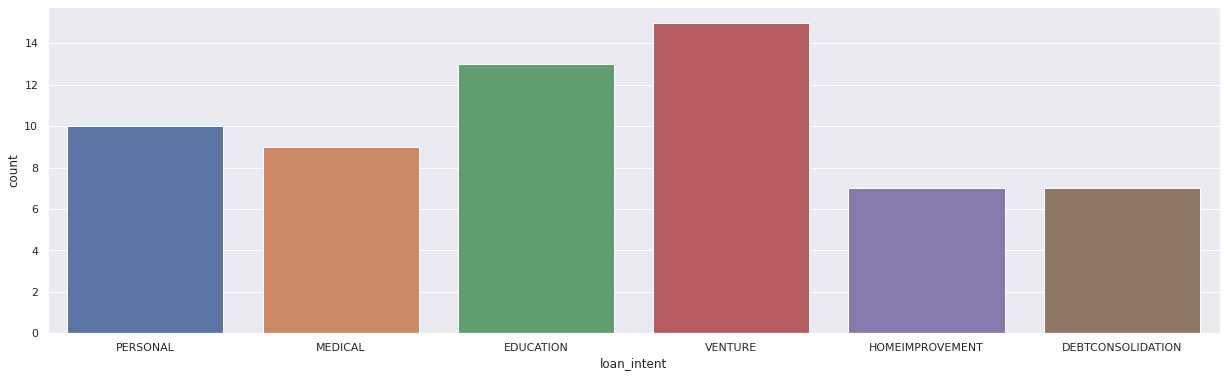

In [160]:
parameter_order = ['PERSONAL','MEDICAL','EDUCATION','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION']
sns.countplot(x = lower_income['loan_intent'], order = parameter_order);
## shows the distribuition of loan intent between people in debts and income higher than 9999

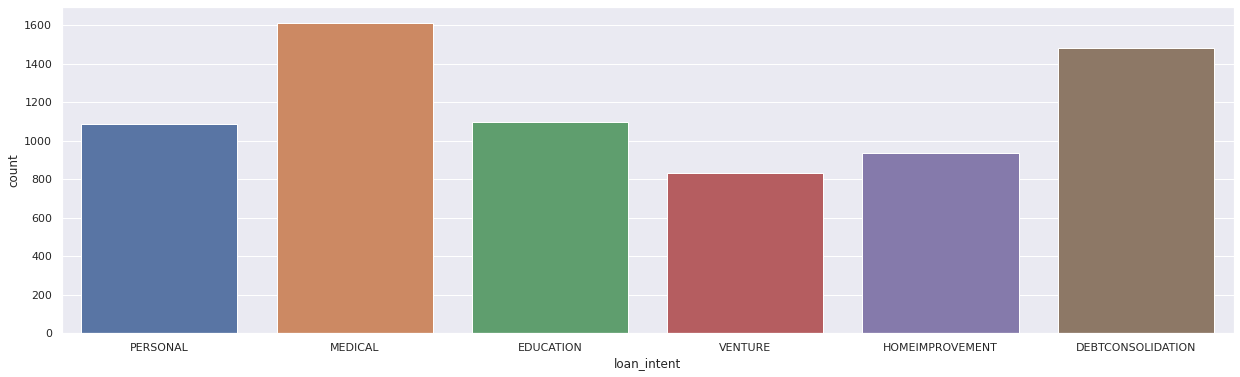

In [161]:
parameter_order = ['PERSONAL','MEDICAL','EDUCATION','VENTURE','HOMEIMPROVEMENT','DEBTCONSOLIDATION']
sns.countplot(x = higher_income['loan_intent'], order = parameter_order);
## shows the distribuition of loan intent between people in debts and income lower than 10000

**PARTIAL CONCLUSIONS 2:**
* Now is possible to understand that people with lower income  and debts usually use more the loans to pay for venture and education purposes.
* Although, people with higher income and debts use more the loans to pay for medical and debt consolidation purposes.
* At a first look it is acceptable to think that, to people with lower income, loans destined to venture and education purposes are more risky. For people with higher income, loans destined to medical and debt consolidation purposes are more risky.


**MEAN VALUES OF SELECTED PARAMETERS IN A CHOSEN INTERVAL:**

In [162]:
from numpy.core.fromnumeric import mean
mean_debt = default['loan_amnt'][default['person_age']> 25][default['person_age']< 40].mean()
## filtering the data and obtaining the mean amount in debt of people between 26 and 39 years old.]
print(mean_debt) 

11262.934000625586


**TREATING DATA INCONSISTENCIES:**

**EXPECTED RESULTS (LOAN STATUS):** the expected output of the machine learning algorithm

In [163]:
## Here we capture the loan status (paid or in debt) related to every person in the dataset
y = data.loan_status

**PREDICTIVE ATTRIBUTES:**

* It is fundamental to comprehend the variables before select the colmns to perform as predictive attributes.
* In this scenario, we need to understand the categorical variables.



**UNDERSTANDING THE CATEGORICAL VARIABLES:**
This dataset have 4 categorical variables:
* person_home_ownership	
* loan_intent
* loan_grade
* cb_person_default_on_file

To understand this variables after reading the dataset description, i will print all unique values of each variable:


In [164]:
variables = ['person_home_ownership' , 'loan_intent' , 'loan_grade' , 'cb_person_default_on_file']
for variable in variables:
  print(variable,data[variable].unique(),'\n')

person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 

loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION'] 

loan_grade ['D' 'B' 'C' 'A' 'E' 'F' 'G'] 

cb_person_default_on_file ['Y' 'N'] 



* This dataset apparently have some strange values: the number 27.718043958742633 is appearing even in the place of categorical data.
* We can use mechanisms to treat this inconsistence with data filtering and treatment:

In [165]:
errors = data.loc[data.person_home_ownership == 27.718043958742633]

* Above we can see how these rows are corrupted: the same value is represented in all columns.
* Since all the values are the same, the better option is to drop the respective rows:

In [166]:
data.drop(errors.index,axis=0,inplace=True) #erasing the rows

* checking again the unique values of each categorical variable:

In [167]:
variables = ['person_home_ownership' , 'loan_intent' , 'loan_grade' , 'cb_person_default_on_file']
for variable in variables:
  print(variable,data[variable].unique(),'\n')

person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] 

loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION'] 

loan_grade ['D' 'B' 'C' 'A' 'E' 'F' 'G'] 

cb_person_default_on_file ['Y' 'N'] 



* Now, to comprehend the categorical data we can plot the **loan_status** per each category (i am trying to comprehend the inclination to loan_status per category, so i need to normalize the data by the number of people since, as we observed in the first graphs, the dataset have much more people without depts then in debts):

person_home_ownership
loan_intent
loan_grade
cb_person_default_on_file


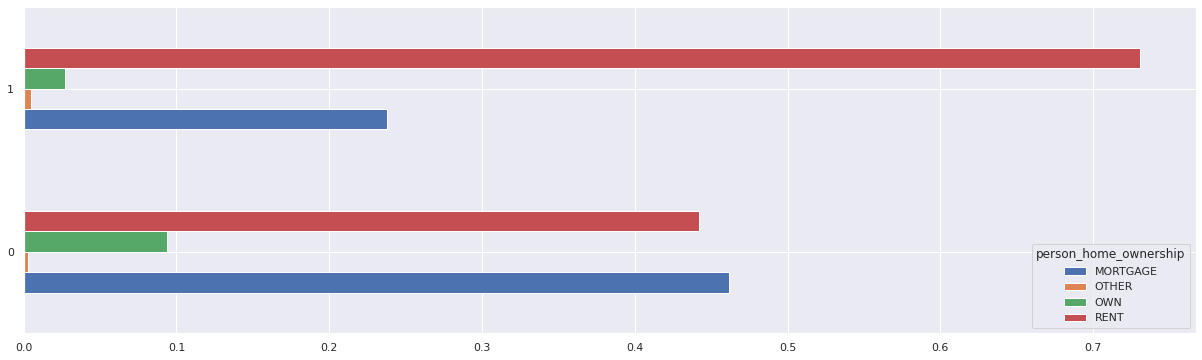

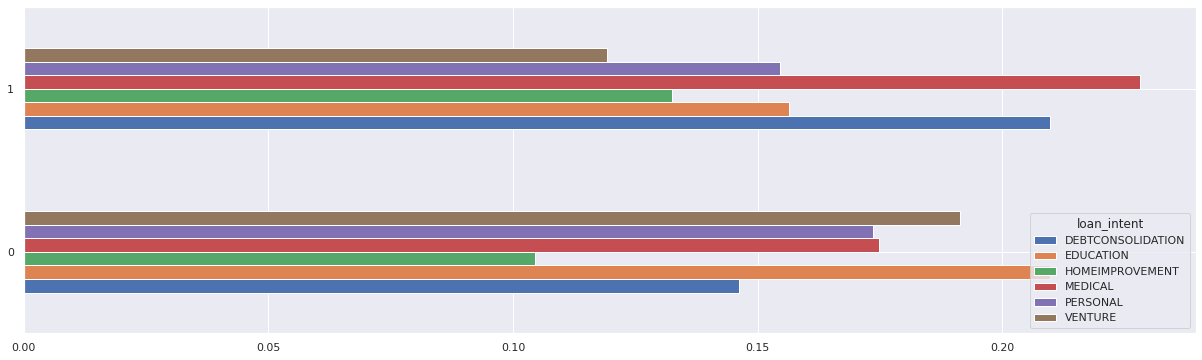

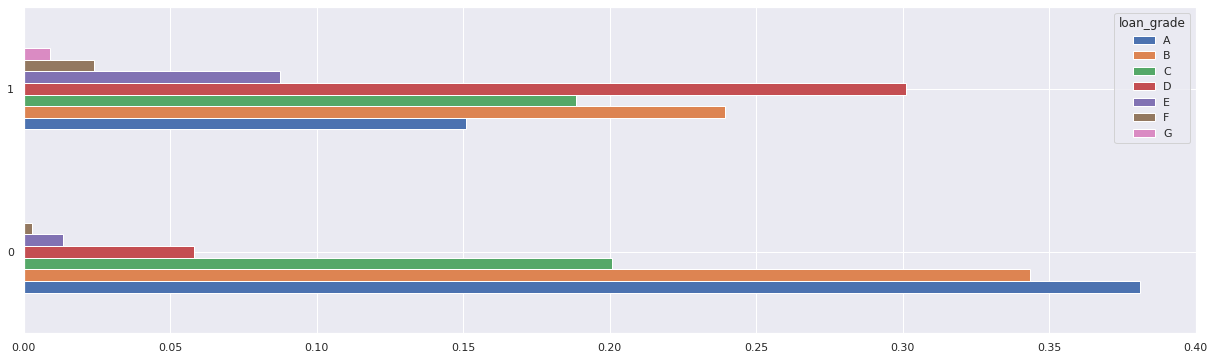

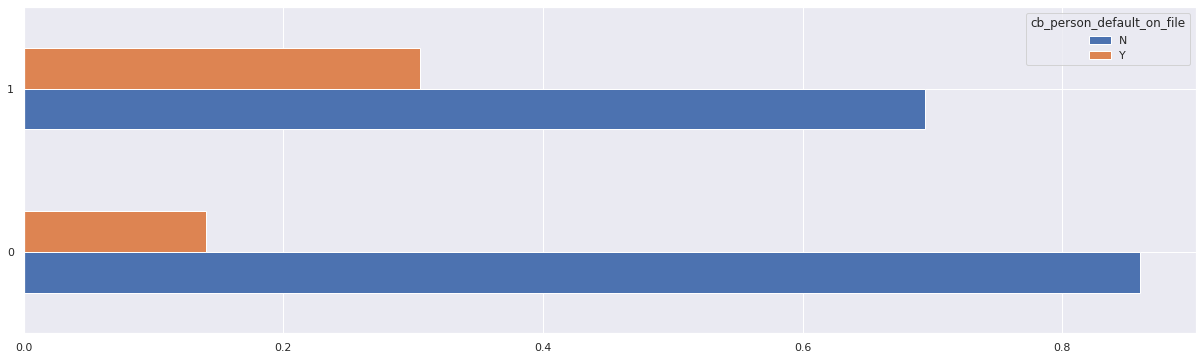

In [168]:
x= len(data[data.loan_status == 0])
y= len(data[data.loan_status == 1])
for feature in data:
  if data[feature].dtype == object and feature != 'loan_status':
    print(feature)
    df = data.groupby('loan_status')[feature].value_counts()
    df = data.groupby('loan_status')[feature].value_counts()
    df2 = df[0].divide(x)
    df3 = df[1].divide(y)
    df4 = pd.concat([df2, df3], keys=['0', '1'])
    ##yep i did all of this because i did not founf a 'inplace' parameter in the documentation of pandas divide for series
    df4.unstack().plot.barh()


* As we can see, some variables have clearly different trends for situations with debts and without debts. This could represent something to a machine learning model. So, the best categorical values to our machine learning models seems to be :



> * **Person home ownership**
> * **loan grade**
> * **Loan intent**






**MUTUAL INFORMATION ANALYSIS:**

* Now we can use Mutual Information looking for the best predictive features.

* Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.
* The first step is encoding the categorical variables (For this step, i am using label encoding, since we just want to check the Mutual Information, later i will encode these variables properly):


In [169]:
X = data.copy() ##copying the dataframe to preserve the actual condition of the original one
y = X.pop("loan_status")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize() ##label encoding 

discrete_features = X.dtypes == int # double-checking if all discrete features now have integer dtypes before using Mutual Information
discrete_features




person_age                     True
person_income                  True
person_home_ownership          True
person_emp_length             False
loan_intent                    True
loan_grade                     True
loan_amnt                      True
loan_int_rate                 False
loan_percent_income           False
cb_person_default_on_file      True
cb_person_cred_hist_length     True
dtype: bool

* Honestly here i'm not so sure about why we need to use garantee only integer dtypes, but i discovered that NaN values were causing errors in the MI process, so i will remove the columns with NaN values of the process and mantain the float ones.

* Since we can't have NaN (missing) values to obtain the Mutual Information (and since they can couse accuracy loss to a machine larning algorithm), i am checking the presence of it:

In [170]:
data.isnull().sum() ##getting all missing values per column

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [171]:
data.shape[0] ##getting the number of rows to understand the percentage of the missing values between all data

32581

* Unfortunally we have a lot of missing values between the 'person_emp_length' and 'loan_int_rate' values.
* We could replace them with the means but this could provide a wrong bias for Mutual information.
* We have some options: **drop these two columns** , **dropping the missing values to get the Mutual Information based only in the existent ones**, **assign a new value for the NaN entries**, **drop the rows with NaN values**(since we have more than 3000 rows with NaN values we could just have accuracy loss). 
* For now i think we can just drop the two columns(i am trying to prove myself and do a good job but for now i'm gonna stay in the basics and leave the performance and accuracy improvements to the future).

In [172]:
X.drop(['person_emp_length','loan_int_rate'],axis=1,inplace=True)

In [173]:

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

person_income                 0.110819
loan_percent_income           0.085616
loan_grade                    0.072630
person_home_ownership         0.027424
cb_person_default_on_file     0.018459
loan_amnt                     0.014783
loan_intent                   0.012565
person_age                    0.000000
cb_person_cred_hist_length    0.000000
Name: MI Scores, dtype: float64

* According to Mutual Value calculation, the best variables to use as predictive features are **person_income ,loan_percent_income , loan_grade , and person_home_ownership**
* The mutual information offer us a clue about what features take as predictive variables, but it's important to not rely only on MI to decide.
* Sometimes, features can have interaction effects about each other, and we can look to this using plots for exemple.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

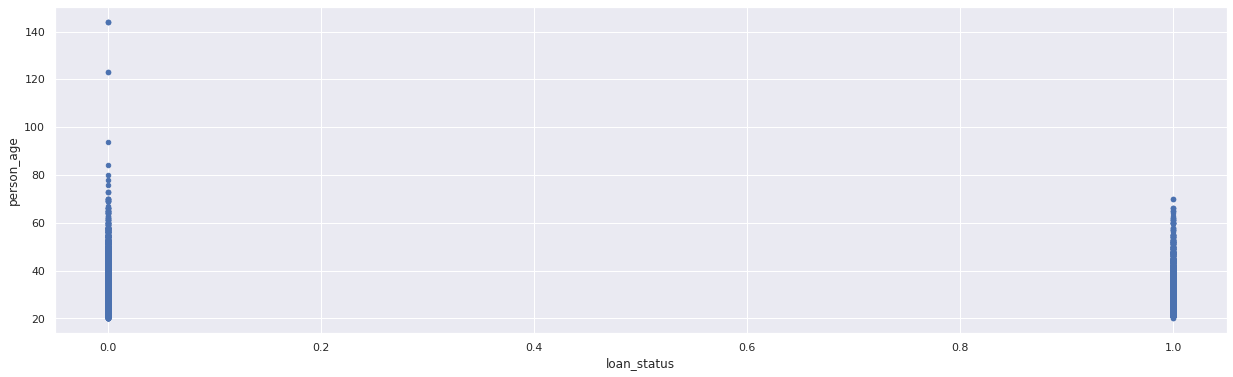

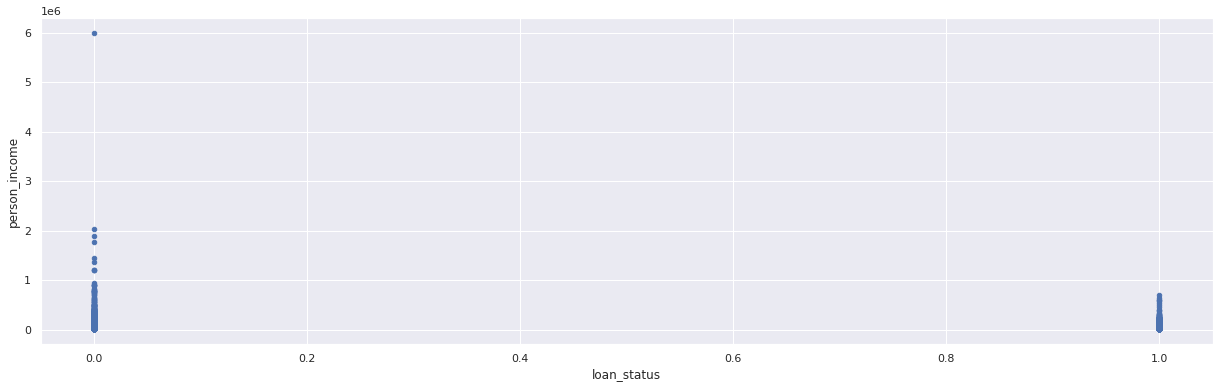

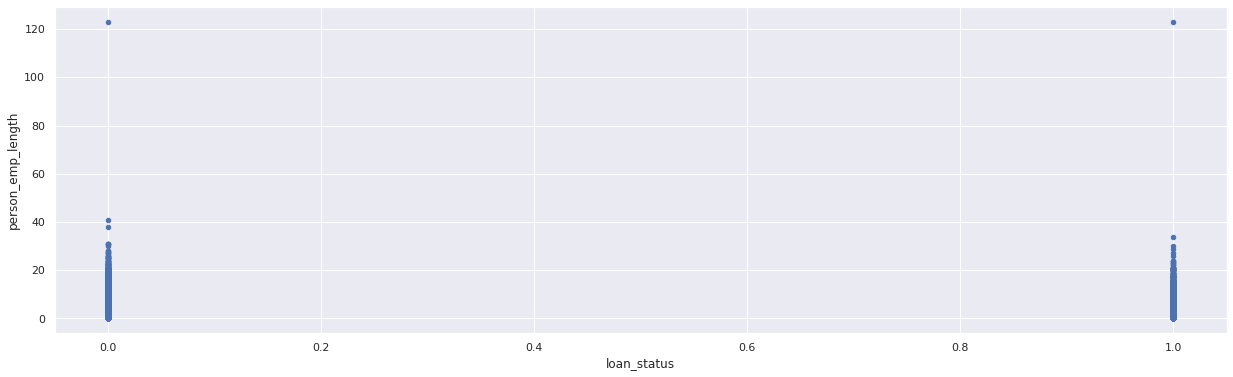

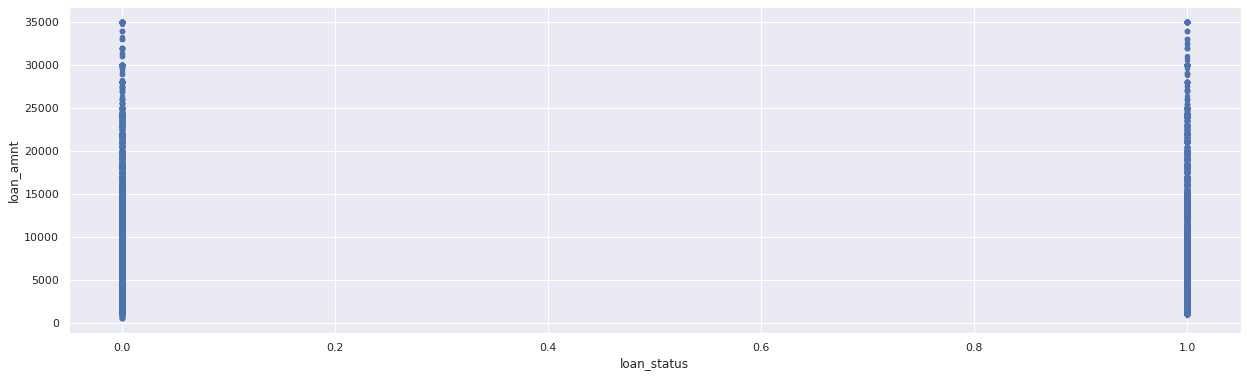

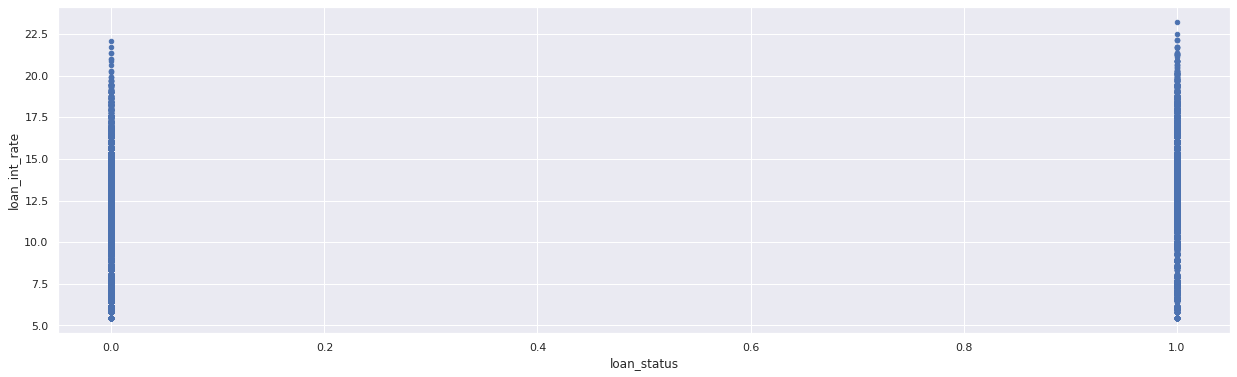

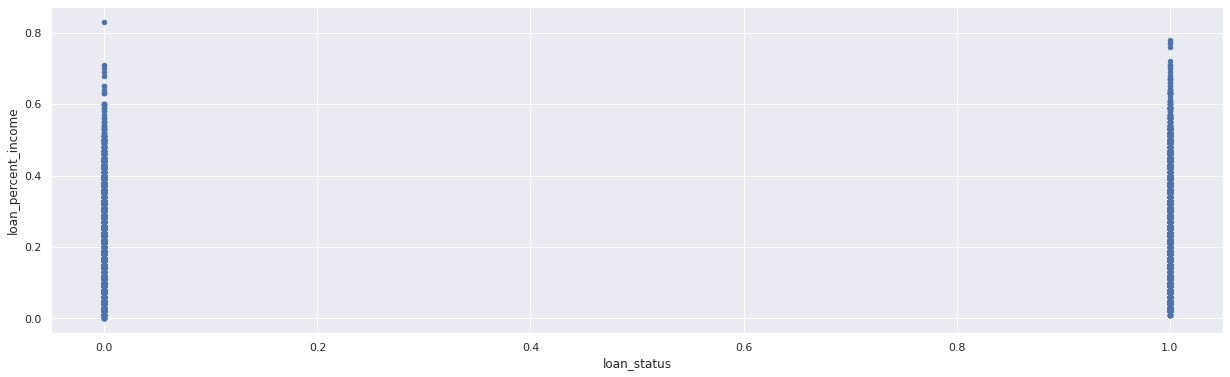

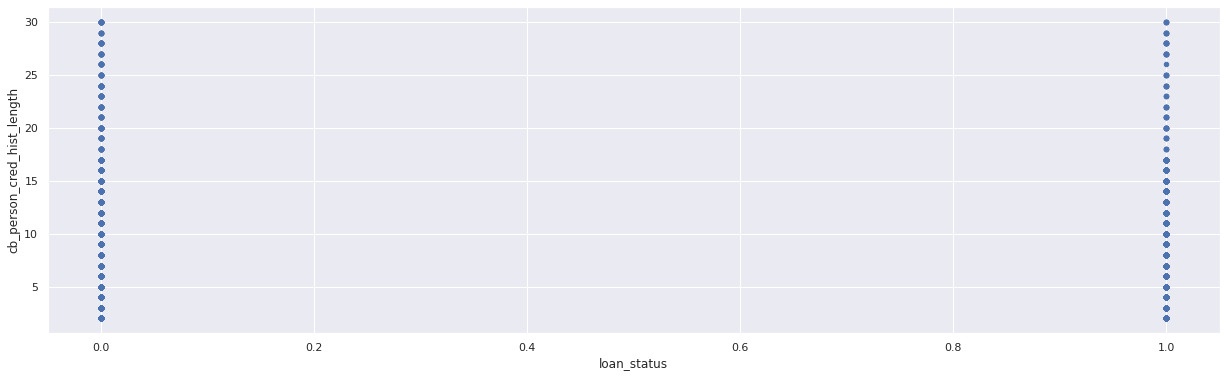

In [174]:
for feature in data:
  if data[feature].dtype != object and feature != 'loan_status':
          data.plot.scatter(x = 'loan_status' , y = feature)

* My methodology after seeing these plots was think about features with restricted presences to certain ranges:
* As an example, after certain **person_income** point, there are no people in debts, but still people without loan debts, so income must represent a good variable to implement as a predictive variable. the same occurs to **pearson_age**
* Although, graphs can also show some possible problems in the data, and in our case We see that, since we have a few people with more than 100 years old, and that could represent an error with the age in some rows. we have to analyze it:

In [175]:
data[data.person_age >100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


* As we can see, there are 5 registers of people older than 100 years old.
* I cannot say for shore that they are wrong, but i can notice some aspects about that:
** We have basically two unique values among this five registers, that seems kinda odd for people with more than 100 years.
** **Education** and **Venture** seems to be strange values to **loan_intent** considering people so old.
* The other values at the respective five rows apparently have no errors, so the best option is change the **person_age** values to the mean value for age

In [176]:
data.at[data[data.person_age>100].index,'person_age'] = data.person_age[data.person_age < 100].mean(axis=0) ##changing the values where the age is higher than 100 to the mean of the ages (ages higher than 100 were excluded from the mean calculus)


**CHOOSED FEATURES AS PREDICTIVE ATTRIBUTES:**
*  As features for the machine learning process, i am choosing **person_income, person_age, loan_percent_income , loan_grade , and person_home_ownership.**
* As a interesting point, i am not using loan amount parameter, since the **loan_percent_income** is a feature based in loan amount, so i don't need to use it directly as attribute. 

**PREDICTIVE ATTRIBUTES:**



> **person_income, person_age, loan_percent_income , loan_grade ,** and **person_home_ownership.**




In [177]:
X = data[["person_income", "person_age", "loan_percent_income" , "loan_grade" , "person_home_ownership"]]
y=data["loan_status"]

* Spliting into training and validation subsets

In [178]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0) ## it means that we have 80% of the dataset as training data and 20% as validation data

* Now we have to encode the two categorical columns: **loan_grade** and **person_home_ownership**
* Since **loan_grade** has a trend (A better than B, better than C and so on..) we can use ordinal encoder to that

In [179]:
X['loan_grade'].to_numpy()

array(['D', 'B', 'C', ..., 'B', 'B', 'B'], dtype=object)

In [180]:
ordinal_encoder = OrdinalEncoder()
X_train["loan_grade"] = ordinal_encoder.fit_transform(X_train["loan_grade"].to_numpy().reshape(-1, 1))
X_valid["loan_grade"] = ordinal_encoder.transform(X_valid["loan_grade"].to_numpy().reshape(-1, 1))

In [181]:
X_train["loan_grade"]


2162     1.0
7670     2.0
24007    1.0
25230    6.0
4897     0.0
        ... 
13123    1.0
19648    2.0
9845     1.0
10799    2.0
2732     0.0
Name: loan_grade, Length: 26064, dtype: float64

* **We can see that the ordination was done using the alphabet order to create numerical values:**
  * **A = 0 , B = 1 , C = 2 ... G = 6**

* Now i will use one hot encoder to treat the categorical variables from the **person_home_ownership** column, since we cannot estipulate a ordering relashionship (**MORTGAGE** certainly is worse than **OWN** and **RENT**, but i cannot really say that **OWN** is better than **RENT** or **OTHER** or vice-versa).

In [182]:
X_train['person_home_ownership'].unique() ## the unique values for person_home_ownership

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER'], dtype=object)

In [183]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded_train = ohe.fit_transform(X_train['person_home_ownership'].values.reshape(-1,1))
encoded_valid = ohe.transform(X_valid['person_home_ownership'].values.reshape(-1,1))

labels = np.array(ohe.categories_).ravel()

train = pd.DataFrame(encoded_train,columns = labels)

valid = pd.DataFrame(encoded_valid,columns = labels)




* Now we just have to drop the original **person_home_ownership** colunms from the datasets and merge the resultant dataframes with the encoded ones



* I have noticed that the number of rows using the len() function was different of the last row's index, so i suspected of something.
* After some research i discovered that the indexes don't change after dropping or erasing rows.
* Since we didn't reseted the indexes for the rows after drop some of them in early stages of preprocessing, the concatenation could get wrong, so before concatenate we have to reset indexes:

In [184]:
X_train.reset_index(drop=True, inplace=True)

X_valid.reset_index(drop=True, inplace=True)

In [185]:
del X_train['person_home_ownership']
del X_valid['person_home_ownership']

pd.concat([X_train,train], axis=1)


,person_income,person_age,loan_percent_income,loan_grade,MORTGAGE,OTHER,OWN,RENT
0,30000,24.0,0.17,1.0,1.0,0.0,0.0,0.0
1,54000,24.0,0.02,2.0,0.0,0.0,1.0,0.0
2,29000,27.0,0.34,1.0,0.0,0.0,0.0,1.0
3,75840,29.0,0.33,6.0,0.0,0.0,1.0,0.0
4,39000,22.0,0.13,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
26059,88494,24.0,0.27,1.0,0.0,0.0,1.0,0.0
26060,35000,32.0,0.11,2.0,1.0,0.0,0.0,0.0
26061,38500,22.0,0.23,1.0,0.0,0.0,0.0,1.0
26062,42000,23.0,0.24,2.0,0.0,0.0,0.0,1.0


**STANDARDISATION OR NORMALIZATION (TO BENEFIT LEARNING ALGORITHMS):**

Note: for predictive values with outlier values it's better to use standardisation;

In [186]:
## standardisation itself
scaler_predictive = StandardScaler()
X_train = scaler_predictive.fit_transform(X_train)

**USING DECISION TREE CLASSIFIER AS MACHINE LEARNING ALGORITHM:**

* For this purpose, we can use the random decision tree classifier instead of the decision tree regressor, since we are dealing with binary CLASSIFICATION.
* In theory, we could use regressor and then convert the float values into 0s and 1s,l but this could lead to a missunderstanding about the importance of distinguish between regressors and classifiers.

In [187]:
DTR_model = DecisionTreeClassifier(random_state=1)
DTR_model.fit(X_train,y_train)
DTR_predictions = DTR_model.predict(X_valid)

accuracy_score(y_valid, DTR_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6957188890593832

**USING RANDOM FOREST CLASSIFIER AS MACHINE LEARNING ALGORITHM:**

* For this purpose, we can use the random forest classifier instead of the random forest regressor, since we are dealing with binary CLASSIFICATION.
* In theory, we could use regressor and then convert the float values into 0s and 1s,l but this could lead to a missunderstanding about the importance of distinguish between regressors and classifiers.

In [188]:
RF2_model = RandomForestClassifier(n_estimators=100, random_state=0)
RF2_model.fit(X_train, y_train)
RF2_predictions = RF2_model.predict(X_valid)

accuracy_score(y_valid, RF_predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.8161730857756636

**USING GRADIENT BOOSTING AS MACHINE LEARNING ALGORITHM:**

In [189]:
XGB_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
XGB_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid.values, y_valid.values)], 
             verbose=False)
XGB_predictions = XGB_model.predict(X_valid.values)

for i in range(len(XGB_predictions)):
  if XGB_predictions[i]>0.5:
    XGB_predictions[i] = 1
  else:
    XGB_predictions[i] = 0

accuracy_score(y_valid, XGB_predictions)

[02:20:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8078870646002762